In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sympy import *
from tabulate import tabulate
from IPython.display import Markdown as md
from IPython.display import display
import seaborn as sns
%matplotlib inline

init_session()
x,y = symbols('x, y', real=True)

IPython console for SymPy 1.8 (Python 3.6.13-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



In [2]:
def  datos_bidimensionales(datos, var1='x', var2='y'):
#     Recibe un numpy array de datos con dos columnas, la primera la interpreta como x y la segunda como y. Devuelve un diccionario con la información del análisis de regresión
    
    tabla = pd.DataFrame({var1: datos[:,0], var2: datos[:,1]})
    numero_datos=tabla.shape[0]

#     print(tabulate(tabla, headers="keys", tablefmt="latex",showindex = False).replace('\\$','$').replace('textbackslash{}',''))

    tabla2 =tabla
    tabla2=tabla2.join(pd.DataFrame({'$'+var1+r'\cdot '+var2+r'$':datos[:,0]*datos[:,1],r'$'+var1+r'^2$':datos[:,0]**2, r'$'+var2+r'^2$':datos[:,1]**2}))
    tabla2.loc['Sumas']=tabla2.sum()
    tabla2.loc['Medias']=tabla2.iloc[:-1].mean()
    tabla2
    # print(tabulate(tabla2, headers="keys", tablefmt="latex",showindex = False).replace('\\$','$').replace('textbackslash{}',''))
#     print(tabulate(tabla2, headers="keys", tablefmt="latex",showindex = True).replace('\\$','$').replace('textbackslash{}','').replace('\^{}','^'))
  
    # Medias
    m1, m2 = [tabla2.loc[tabla2.index[-2]][c]/numero_datos for c in range(2)]
    medias=[m1,m2]
#     display(medias)
    vari =[var1, var2]


    latex_sol =r'\\ \\ Las medias son: \\'
    for c in range(2) :
        latex_sol += r"$\overline{"+tabla.columns[c]+r"}=\frac{\Sigma{"+vari[c]+r"_i}}{N}="+ \
        r"\frac{"+str(tabla2.loc[tabla2.index[-2]][c])+ \
        r"}{"+latex(numero_datos)+r"}="+latex(tabla2.loc[tabla2.index[-2]][c]/numero_datos)+"$. "
    
    latex_sol += r' El centro de gravedad es: $('+latex(m1)+r','+latex(m2)+')$'     

    # Desviaciones típicas y covarianza
    s1, s2 = [sqrt(tabla2.loc[tabla2.index[-2]][c+3]/numero_datos-medias[c]**2) for c in range(2)]
    sxy=tabla2.loc[tabla2.index[-2]][2]/numero_datos-m1*m2
#     display(s1,s2,sxy)
 
    latex_sol += r' \\ \\ Varianzas y covarianzas'+ \
    r'\\ $\sigma_'+var1+r'=\sqrt{\frac{\sum{'+var1+r'_i^2}}{N}-\overline{'+var1+r'}^2}=\sqrt{\frac{'+latex(tabla2.loc[tabla2.index[-2]][3])+r'}{'+ \
    latex(numero_datos)+r'}-'+latex(medias[0])+r'^2}='+latex(s1)+r'$.' + \
    r'\\ $\sigma_'+var2+r'=\sqrt{\frac{\sum{'+var2+r'_i^2}}{N}-\overline{'+var2+r'}^2}=\sqrt{\frac{'+latex(tabla2.loc[tabla2.index[-2]][4])+r'}{'+ \
    latex(numero_datos)+r'}-'+latex(medias[1])+r'^2}='+latex(s2)+r'$.'+ \
    r'\\ $\sigma_{'+var1+var2+r'}=\frac{\sum{'+var1+r'_i \cdot '+var2+r'_i}}{N}-\overline{'+var1+r'}\cdot \overline{'+var2+r'}=\frac{'+latex(tabla2.loc[tabla2.index[-2]][2])+r'}{'+ \
    latex(numero_datos)+r'}-'+latex(medias[0])+r'\cdot '+latex(medias[1])+r'='+latex(sxy)+r'$.'
    
    
    latex_sol += r' \\ \\ Correlación'+ \
    r'\\ $r=\dfrac{\sigma_{'+var1+var2+r'}}{\sigma_'+var1+r' \cdot \sigma_'+var2+r'}=\frac{'+latex(sxy)+r'}{'+ \
    latex(s1)+r'\cdot '+latex(s2)+r'}='+latex(sxy/(s1*s2))+r'$.'

    pendiente, ordenada, coefcorr = stats.linregress(datos)[:3]
#   display(pendiente, ordenada, coefcorr, Eq(y,pendiente*x+ordenada))

    latex_sol += r' \\ \\ Recta de regresión: \\ La pendiente es: '+latex(pendiente)+r', la ordenada en el origen: '+latex(ordenada) \
                +r', El coeficiente de correlación:'+latex(coefcorr)+r' y la recta de regresión: $'+latex( Eq(y,pendiente*x+ordenada))+r'$'
    
    d=dict()
    
    d['tabla_ini']=tabla
    d['tabla_ini_latex']=tabulate(tabla, headers="keys", tablefmt="latex",showindex = False).replace('\\$','$').replace('textbackslash{}','')
    d['tabla_fin_latex']=tabulate(tabla2, headers="keys", tablefmt="latex",showindex = True).replace('\\$','$').replace('textbackslash{}','').replace('\^{}','^')
    d['tabla_fin']=tabla2
    d['latex']=latex_sol 
    d['figura']=sns.regplot(x=datos[:,0],y=datos[:,1]).figure
    
    return d

# datos_bidimensionales(datos)

# f1.savefig('regresion.pgf')

# datos_bidimensionales(datos)['figura'].show()

Distribuciones bidimensionales 
En una muestra de diez viviendas de una urbanización se han contabilizado el número de personas (X)que viven en cada una y el número de habitaciones (Y) que tiene. La tabla siguiente contiene los datos recogidos: 
X 5 3 2 4 1 3 6 2 5 4 Y 5 4 2 4 2 5 5 4 4 5 
a) Dibuja el diagrama de dispersión. ¿Existe relación lineal entre las variables? b) Calcula la covarianza y Explica los resultados. 

\begin{tabular}{lrrrrr}
\hline
        &    a &   b &   $a\cdot b$ &   $a^2$ &   $b^2$ \\
\hline
 0      &  5   &   5 &         25   &    25   &    25   \\
 1      &  3   &   4 &         12   &     9   &    16   \\
 2      &  2   &   2 &          4   &     4   &     4   \\
 3      &  4   &   4 &         16   &    16   &    16   \\
 4      &  1   &   2 &          2   &     1   &     4   \\
 5      &  3   &   5 &         15   &     9   &    25   \\
 6      &  6   &   5 &         30   &    36   &    25   \\
 7      &  2   &   4 &          8   &     4   &    16   \\
 8      &  5   &   4 &         20   &    25   &    16   \\
 9      &  4   &   5 &         20   &    16   &    25   \\
 Sumas  & 35   &  40 &        152   &   145   &   172   \\
 Medias &  3.5 &   4 &         15.2 &    14.5 &    17.2 \\
\hline
\end{tabular}
\\ \\ Las medias son: \\$\overline{a}=\frac{\Sigma{a_i}}{N}=\frac{35.0}{10}=3.5$. $\overline{b}=\frac{\Sigma{b_i}}{N}=\frac{40.0}{10}=4.0$.  El centro de gravedad es: $(3.5,4

array([[5, 5],
       [3, 4],
       [2, 2],
       [4, 4],
       [1, 2],
       [3, 5],
       [6, 5],
       [2, 4],
       [5, 4],
       [4, 5]])

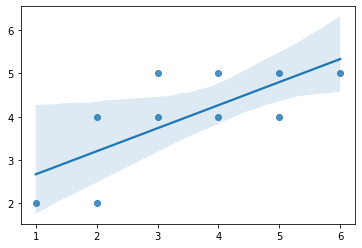

In [3]:
st='5 3 2 4 1 3 6 2 5 4 5 4 2 4 2 5 5 4 4 5'
st = st.split(' ')
# int(len(st)/2)
datos=np.array(list(map(int, st))).reshape(2,int(len(st)/2)).transpose()
%matplotlib inline
d = datos_bidimensionales(datos,'a','b')
# print(d['tabla_ini_latex'])
print(d['tabla_fin_latex'])
print(d['latex'])

datos


 Se han recogido datos sobre la altura, la talla de calzado y el peso de doce personas en la siguiente tabla:

| ALTURA ( cm )   | 180  | 190  | 170  | 169  | 171  | 164  | 165  | 181  | 185  | 195  | 157  | 162  |
| --------------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| TALLA DE ZAPATO | 44   | 44   | 42   | 40   | 41   | 38   | 38   | 43   | 44   | 46   | 35   | 36   |
| PESO ( kg )     | 85   | 95   | 68   | 63   | 73   | 59   | 66   | 80   | 83   | 94   | 55   | 60   |

a) Halla el coeficiente de correlación entre las variables x-y y entre las variables x-z.
b) ¿Qué conclusiones sacas de los resultados obtenidos?
Comprueba los resultados con la calculadora.

\begin{tabular}{lrrrrr}
\hline
        &        x &        y &   $x\cdot y$ &    $x^2$ &    $y^2$ \\
\hline
 0      &  180     &  44      &      7920    &  32400   &  1936    \\
 1      &  190     &  44      &      8360    &  36100   &  1936    \\
 2      &  170     &  42      &      7140    &  28900   &  1764    \\
 3      &  169     &  40      &      6760    &  28561   &  1600    \\
 4      &  171     &  41      &      7011    &  29241   &  1681    \\
 5      &  164     &  38      &      6232    &  26896   &  1444    \\
 6      &  165     &  38      &      6270    &  27225   &  1444    \\
 7      &  181     &  43      &      7783    &  32761   &  1849    \\
 8      &  185     &  44      &      8140    &  34225   &  1936    \\
 9      &  195     &  46      &      8970    &  38025   &  2116    \\
 10     &  157     &  35      &      5495    &  24649   &  1225    \\
 11     &  162     &  36      &      5832    &  26244   &  1296    \\
 Sumas  & 2089     & 491      &     85913    & 36522

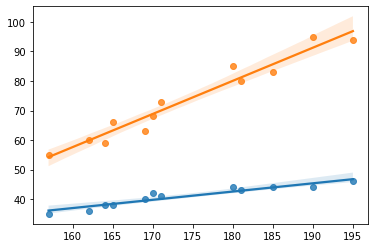

In [7]:
st='180	190	170	169	171	164	165	181	185	195	157	162'
st=st.split('\t')
lx = list(map(int,st))

st='44	44	42	40	41	38	38	43	44	46	35	36'
st=st.split('\t')
ly = list(map(int,st))

st='85	95	68	63	73	59	66	80	83	94	55	60'
st=st.split('\t')
lz = list(map(int,st))

datos = np.array([lx,ly,lz])

datos1=datos[:-1].transpose()
datos2=datos[[0,2]].transpose()


%matplotlib inline

d1 = datos_bidimensionales(datos1,'x','y')
# print(d['tabla_ini_latex'])
print(d1['tabla_fin_latex'])
print(d1['latex'])


d2 = datos_bidimensionales(datos2,'x','z')
# print(d['tabla_ini_latex'])
print(d2['tabla_fin_latex'])
print(d2['latex'])




In [5]:
Eq(y,x)